Assignmnet-03 [Manisha Rout-21BAI1605]

In [1]:
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv("penguins_size.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


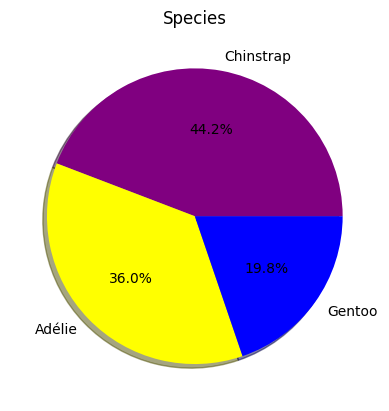

In [12]:
import matplotlib.pyplot as plt

plt.pie(df.species.value_counts(),labels = ['Chinstrap','Adélie','Gentoo'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow','blue'],)
plt.title('Species')
plt.show()

<Axes: ylabel='island'>

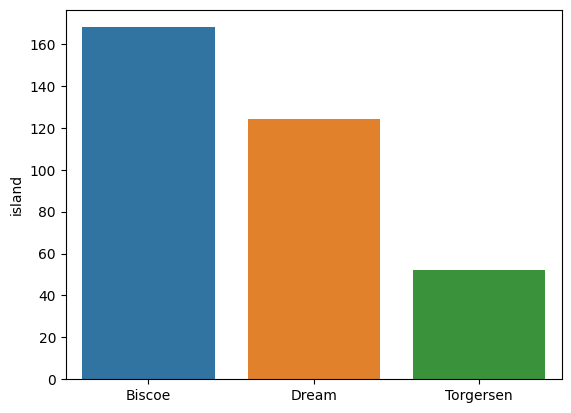

In [14]:
import seaborn as sns
sns.barplot(x =df.island.value_counts().index,y =df.island.value_counts())

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

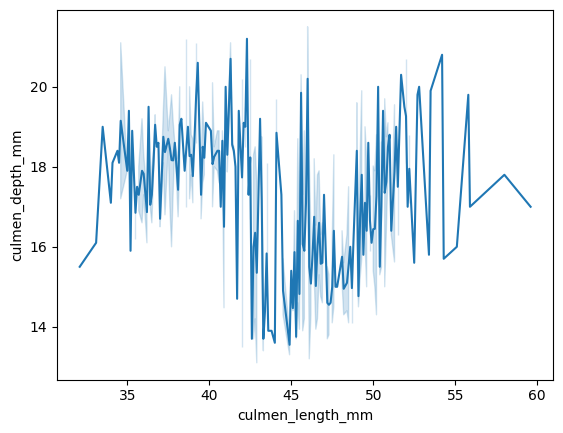

In [16]:
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

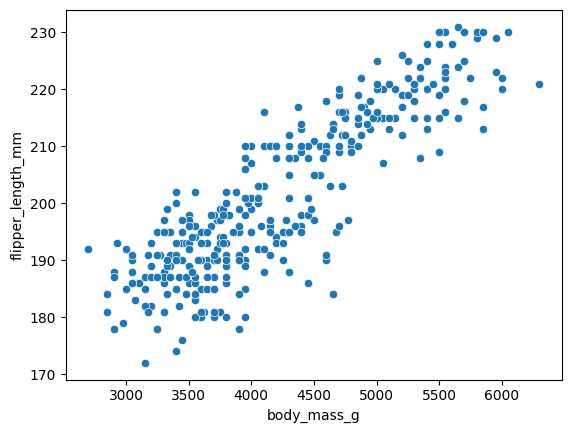

In [20]:
sns.scatterplot(x = df.body_mass_g,y=df.flipper_length_mm)

<ipython-input-22-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

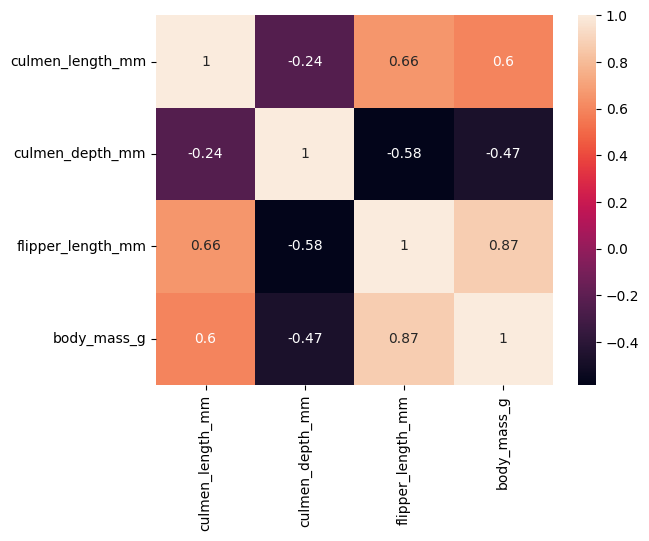

In [22]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

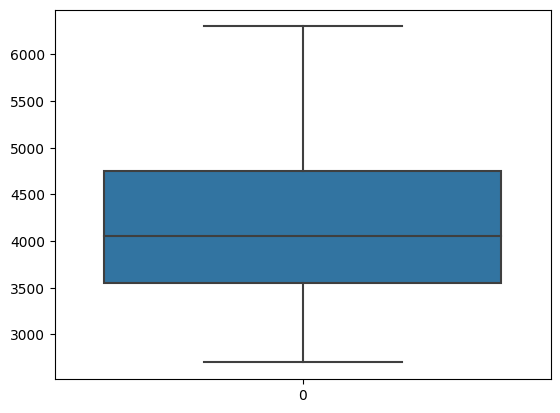

In [24]:
sns.boxplot(df.body_mass_g)

<Axes: >

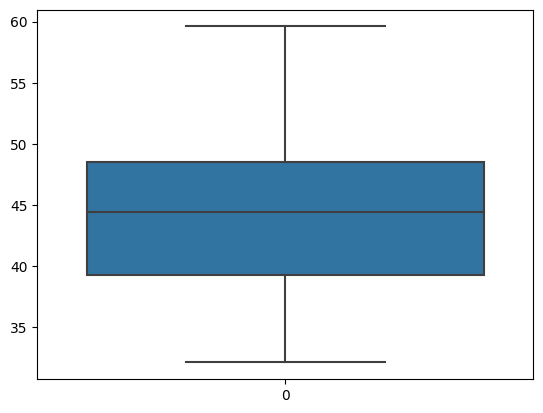

In [26]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

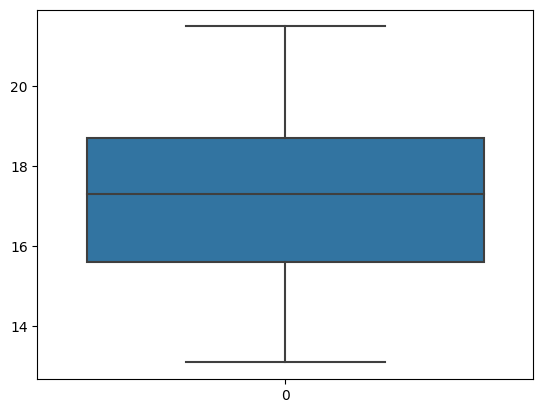

In [28]:
sns.boxplot(df.culmen_depth_mm)

In [29]:
cat_obj = list(df.select_dtypes(include ='object'))
cat_obj

['species', 'island', 'sex']

In [31]:
x = df.drop('species',axis=1)
y = df.species

In [32]:
gender_mapping = {"FEMALE": 1, "MALE": 0}
x["sex"] = x["sex"].map(gender_mapping)
x = pd.get_dummies(x,columns =['island'])
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0.0,0,0,1
1,39.5,17.4,186.0,3800.0,1.0,0,0,1
2,40.3,18.0,195.0,3250.0,1.0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,0,0,1
4,36.7,19.3,193.0,3450.0,1.0,0,0,1


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
scale =MinMaxScaler()
le = LabelEncoder()

df.species = le.fit_transform(df.species)
y = df.species
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [35]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0.0,0,0,1
1,39.5,17.4,186.0,3800.0,1.0,0,0,1
2,40.3,18.0,195.0,3250.0,1.0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,0,0,1
4,36.7,19.3,193.0,3450.0,1.0,0,0,1


In [36]:
X_scaled= pd.DataFrame(scale.fit_transform(x),columns =x.columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,1.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,1.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,1.0,0.0,0.0,1.0


In [37]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10,shuffle = True)

In [38]:
X_train.shape

(240, 8)

In [39]:
y_train.shape

(240,)

In [40]:
X_test.shape

(104, 8)

In [41]:
y_test.shape

(104,)